# Lab3 参数估计 & 非参数估计
- 姓名：彭钰钊
- 学号：2110756
- 专业：计算机科学与技术
- GitHub链接：https://github.com/Yuzhao-P/Machine-Learning
    > 上传历次实验数据文件和.ipynb文件，同时在README.md中更新有关实验的相关知识整理。
## 实验要求
### 基本要求
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵  $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

### 中级要求
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

### 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

***截止日期：11月3日***

- 以学号+姓名(3)的命名形式打包实验代码+实验报告发送到邮箱18329300691@163.com
- 推荐使用.ipynb文件格式

### 导入所需要的包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 数据生成
使用Numpy生成本次实验所需要的数据集，以下是本次数据生成中可能用到的相关方法:
- **multivariate_normal**   
    函数参数如下：  
    np.random.multivariate_normal(  
    mean,  # 均值，维度为1  
    cov,  # 协方差矩阵  
    size=None,  # 指定生成的正态分布矩阵的维度  
    check_valid=None,  
    tol=None)  

- **choice**   
    random.choice(a,  # 列表/元组/字符串  
    size=None,  
    replace=True,  
    p=None)  # 数组，大小（size）应该与指定的a相同，用来规定选取a中每个元素的概率，默认为概率相同

- **identity**  生成单位对角阵  

当然还有一些方法如`zeros`、`ones`等，在此不作过多赘述。

**标签**生成策略：  
我们采用最简单的标签，不代表任何特殊含义仅仅表示不同的数据类别，即表示来自于哪一个分布模型。

下面对**均值向量**做出简单解释以便于我们检查生成的数据是否符合要求：
> 1. 向量：
>   - 向量是一种有序的数据集合，通常按照一维数组的形式表示。
>   - 向量可以包含一维数据，例如，一个包含了一组数字的列表，如 [1, 2, 3]。
>   - 向量通常用于表示空间中的点、方向、速度、力等物理量。
>   - 向量的数学表示通常使用列向量或行向量来表示，例如：\[ $\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ \] 或 \($\mathbf{v} = [1, 2, 3]$\)。
> 2. 张量：
>   - 张量是一个更一般化的概念，它可以包含多维数据，可以是一维、二维、三维，甚至更高维。
>   - 标量（0维张量）是单个数字，向量（1维张量）是有序的一维数组，矩阵（2维张量）是有序的二维数组。
>   - 张量广泛用于线性代数、微积分、物理学、工程学、机器学习等领域，用于表示多维数据、多维数组或多维矩阵。
>   - 在深度学习中，神经网络的输入和输出通常表示为张量，例如，图像数据可以表示为3维张量（高度、宽度、通道数），时间序列数据可以表示为3维张量（序列长度、特征数、批次数）。
>
> 总结来说，向量是一种特殊的一维张量，而张量是一个更通用的数学对象，可以包含不同维度的数据。在不同领域和上下文中，这些术语可能会有不同的具体含义，但它们都用于处理和表示数据。

那么我们本次实验中的均值向量代表的含义是三个分布模型样本横纵坐标的均值，即(1, 4)、(4, 1)和(8, 4)，我们将在散点图中以红色的'*'标识。

In [2]:
# 均值向量
mu1 = np.array([1, 4])
mu2 = np.array([4, 1])
mu3 = np.array([8, 4])
mean = np.array([mu1, mu2, mu3])

# 协方差矩阵
cov_matrix = 2 * np.identity(2)

# 先验概率
prior_probabilities_X1 = np.array([1/3, 1/3, 1/3])
prior_probabilities_X2 = np.array([0.6, 0.3, 0.1])

In [3]:
# 生成正态分布数据
def Generate_Samples(mean, cov_matrix, prior_probabilities):
    """
        参数：
            mean                均值向量
            cov_matix           协方差矩阵
            prior_probabilities 先验概率
            
        返回值：数据集——前两列分别是x和y，最后一列是label(类别标签)
    """
    coordinate = np.zeros((1000, 2))  # 坐标初始化(x, y)
    labels = np.ones((1000, 1))  # 注意需要规定统一的维度，以便后续合并
    for i in range(1000):
        label = np.random.choice([0, 1, 2], p=prior_probabilities)  # 按照先验概率随机选取三类分布模型
        if label == 0:  # 均值向量为(1, 4)的样本和标签0
            coordinate[i] = np.random.multivariate_normal(mean[0], cov_matrix)
            labels[i] = label
        elif label == 1:
            coordinate[i] = np.random.multivariate_normal(mean[1], cov_matrix)
            labels[i] = label
        else:
            coordinate[i] = np.random.multivariate_normal(mean[2], cov_matrix)
            labels[i] = label
    result = np.hstack((coordinate, labels))  # 将坐标和标签合并为结果数据集返回
    return result

In [4]:
# 可视化数据集——散点图
def show_dataset(data, mean):
    plt.figure()
    for i in range(3):
        plt.plot(data[data[:, 2] == i][:, 0], data[data[:, 2] == i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()

In [5]:
# 生成数据集
X1 = Generate_Samples(mean, cov_matrix, prior_probabilities_X1)
X2 = Generate_Samples(mean, cov_matrix, prior_probabilities_X2)

我们通过调用定义好的数据集生成函数Generate_Samples来生成了两个二维随机向量的数据集合 $X_1$ 和 $X_2$，现在检查是否满足要求：
1. N = 1000

2. 数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$

3. $X_1$，来自三个分布模型的先验概率相同 ；$X_2$，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$

In [6]:
# 打印数据集形状
X1.shape, X2.shape

((1000, 3), (1000, 3))

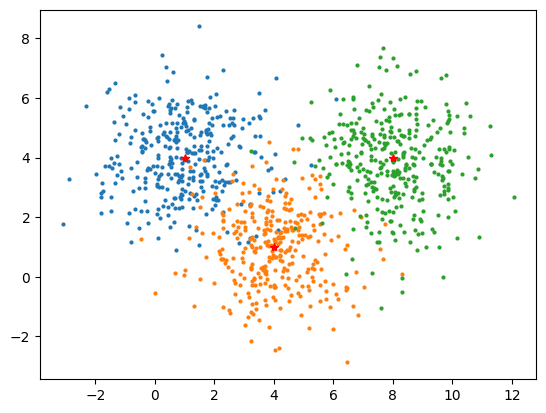

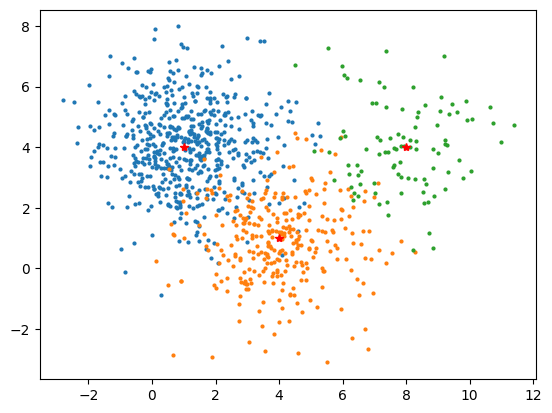

In [7]:
# 可视化数据集
show_dataset(X1, mean)
show_dataset(X2, mean)

通过上述两个步骤，我们看见了数据集生成维度的正确性，从可视化散点图中可以看见三个分布模型基本按照先验概率分布在均值向量周围，再次验证了数据生成的正确性。

## 基本要求
### 似然率测试规则 & 最大后验概率规则
#### 似然率测试规则
> 似然和似然函数：https://zhuanlan.zhihu.com/p/42598338
- 似然率测试规则是一种基于似然函数的分类规则。在这个规则中，每个类别对应一个似然函数，用于描述样本在该类别下生成的概率分布。
- 对于一个给定的样本，计算它在每个类别下的似然函数值，然后选择具有最大似然函数值的类别作为分类结果。
- 数学表达式：$\hat{y} = \argmax _c{p(x|\theta _c)}$
- 这种规则假设数据是根据某个已知概率分布生成的，通常用于正态分布等情况。

对于n维正态分布而言，其概率密度函数的矩阵表达为$$p(x|\mu, \Sigma)=\frac{1}{\sqrt[n]{2\pi}|\Sigma|^{\frac{1}{2}}}e^{-(\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))}$$其中$\mu$是均值，$\Sigma$是协方差矩阵。

协方差计算公式：$Cov(x, y) = E[(X-E[X])(Y-E[Y]))$  
协方差矩阵计算公式:$\Sigma = E[(X-\mu)(X-\mu)^T]$
> https://baike.baidu.com/item/%E5%8D%8F%E6%96%B9%E5%B7%AE/2185936

In [8]:
def likelihood_ratio_test_rule(dataset):
    # 按标签划分数据集
    data_0 = []
    data_1 = []
    data_2 = []
    data_0.extend(dataset[dataset[:, 2] == 0][:, :2])
    data_1.extend(dataset[dataset[:, 2] == 1][:, :2])
    data_2.extend(dataset[dataset[:, 2] == 2][:, :2])
    # 计算 mu 和 cov_matrix
    mu1, mu2, mu3 = np.mean(data_0, axis=0), np.mean(data_1, axis=0), np.mean(data_2, axis=0)
    cov1 = np.mean(np.array([np.dot((data_0[i] - mu1).reshape(2, 1), (data_0[i] - mu1).reshape(1, 2)) for i in range(len(data_0))]), axis=0)
    cov2 = np.mean(np.array([np.dot((data_1[i] - mu2).reshape(2, 1), (data_1[i] - mu2).reshape(1, 2)) for i in range(len(data_1))]), axis=0)
    cov3 = np.mean(np.array([np.dot((data_2[i] - mu3).reshape(2, 1), (data_2[i] - mu3).reshape(1, 2)) for i in range(len(data_2))]), axis=0)
    # 计算 cov_matrix 的行列式
    cov1_det = np.linalg.det(cov1)
    cov2_det = np.linalg.det(cov2)
    cov3_det = np.linalg.det(cov3)
    # 计算 cov_matrix 的逆
    cov1_inv = np.linalg.inv(cov1)
    cov2_inv = np.linalg.inv(cov2)
    cov3_inv = np.linalg.inv(cov3)
    # 切割数据和标签
    data = dataset[:, :2]
    label = dataset[:,2]
    # 存放最大概率标签
    lst = []
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(dataset.shape[0]):
        # 暂存标签对应的概率
        temp = []
        temp.append(1 / (2 * np.pi * np.sqrt(cov1_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu1), cov1_inv), (data[i] - mu1).T)))
        temp.append(1 / (2 * np.pi * np.sqrt(cov2_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu2), cov2_inv), (data[i] - mu2).T)))
        temp.append(1 / (2 * np.pi * np.sqrt(cov3_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu3), cov3_inv), (data[i] - mu3).T)))
        # 找到最大概率标签并加入 lst
        lst.append(temp.index(max(temp)))
    # 计算错误率
    res = 1 - np.sum(lst == label) / label.shape
    return res[0]

为了便于分析我将结果在后面集中进行展示~

#### 最大后验概率规则
- 最大后验概率规则是一种基于贝叶斯定理的分类规则。在这个规则中，除了似然函数，还考虑了先验概率，用于描述每个类别的先验信息。
- 对于一个给定的样本，计算它在每个类别下的后验概率，并选择具有最大后验概率的类别作为分类结果。
- 数学表达式：$\hat{y} =  \argmax _c{p(\theta _c|x)} = \argmax _c\frac{p(x|\theta _c)·p(\theta _c)}{p(x)}$
- 这种规则不仅考虑了似然函数，还考虑了类别的先验信息，通常用于情况较为复杂的分类问题。

在上面这个公式中$p(x|\theta _c)$实际上就是最大似然估计中的所计算的概率，$p(\theta _c)$是先验概率，$p(x)$是一个常数，因此我们在比较大小时可以忽略它。

那么我们可以发现代码的复用率很高，其实我们可以将两种方法封装到同一个函数中，即似然率测试规则估计默认先验概率为1，只不过我们这里是逐步分析到此，我有些不忍心，因此就直接Ctrl+C/V大法了，在实际工程中我们还是要尽可能的摒弃这种不必要的不舍，以精简代码减小程序占用内存为首要目的。

In [9]:
def maximum_a_posteriori_probability_rule(dataset, prior_probabilities):
    # 按标签划分数据集
    data_0 = []
    data_1 = []
    data_2 = []
    data_0.extend(dataset[dataset[:, 2] == 0][:, :2])
    data_1.extend(dataset[dataset[:, 2] == 1][:, :2])
    data_2.extend(dataset[dataset[:, 2] == 2][:, :2])
    # 计算 mu 和 cov_matrix
    mu1, mu2, mu3 = np.mean(data_0, axis=0), np.mean(data_1, axis=0), np.mean(data_2, axis=0)
    cov1 = np.mean(np.array([np.dot((data_0[i] - mu1).reshape(2, 1), (data_0[i] - mu1).reshape(1, 2)) for i in range(len(data_0))]), axis=0)
    cov2 = np.mean(np.array([np.dot((data_1[i] - mu2).reshape(2, 1), (data_1[i] - mu2).reshape(1, 2)) for i in range(len(data_1))]), axis=0)
    cov3 = np.mean(np.array([np.dot((data_2[i] - mu3).reshape(2, 1), (data_2[i] - mu3).reshape(1, 2)) for i in range(len(data_2))]), axis=0)
    # 计算 cov_matrix 的行列式
    cov1_det = np.linalg.det(cov1)
    cov2_det = np.linalg.det(cov2)
    cov3_det = np.linalg.det(cov3)
    # 计算 cov_matrix 的逆
    cov1_inv = np.linalg.inv(cov1)
    cov2_inv = np.linalg.inv(cov2)
    cov3_inv = np.linalg.inv(cov3)
    # 切割数据和标签
    data = dataset[:, :2]
    label = dataset[:,2]
    # 存放最大概率标签
    lst = []
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(dataset.shape[0]):
        # 暂存标签对应的概率
        temp = []
        temp.append(prior_probabilities[0] * 1 / (2 * np.pi * np.sqrt(cov1_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu1), cov1_inv), (data[i] - mu1).T)))
        temp.append(prior_probabilities[1] * 1 / (2 * np.pi * np.sqrt(cov2_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu2), cov2_inv), (data[i] - mu2).T)))
        temp.append(prior_probabilities[2] * 1 / (2 * np.pi * np.sqrt(cov3_det)) * np.exp(-0.5 * np.dot(np.dot((data[i] - mu3), cov3_inv), (data[i] - mu3).T)))
        # 找到最大概率标签并加入 lst
        lst.append(temp.index(max(temp)))
    # 计算错误率
    res = 1 - np.sum(lst == label) / label.shape
    return res[0]

In [10]:
# 似然率测试规则——分类实验错误率
print("X1-似然率测试规则    分类错误率：", likelihood_ratio_test_rule(X1) )
print("X2-似然率测试规则    分类错误率：", likelihood_ratio_test_rule(X2) )

X1-似然率测试规则    分类错误率： 0.05700000000000005
X2-似然率测试规则    分类错误率： 0.07899999999999996


In [11]:
# 最大后验概率测试规则——分类实验错误率
print("X1-最大后验概率测试规则    分类错误率：", maximum_a_posteriori_probability_rule(X1, prior_probabilities_X1) )
print("X2-最大后验概率测试规则    分类错误率：", maximum_a_posteriori_probability_rule(X2, prior_probabilities_X2) )

X1-最大后验概率测试规则    分类错误率： 0.05700000000000005
X2-最大后验概率测试规则    分类错误率： 0.07199999999999995


#### 实验结果分析
- 应用“似然率测试规则”和“最大后验概率规则”在X1数据集上的分类结果一致，我们前面对于两种方法的分析指出，其区别仅仅在于是否需要乘以先验概率，而对于X1数据集而言，其先验概率相同，因此两种方法的分类结果一致。

- 当先验概率确定且不同时，分类结果可能会相对更准确一点，从我们的实验结果来说最大后验概率规则相较于似然率测试规则的错误率要低一些。

## 中级要求
### 高斯核函数密度估计
高斯核函数公式：$\phi(u)=\frac{1}{\sqrt{2\pi}}\exp\{-\frac{1}{2}||u||^2\}$

高斯核概率密度函数公式：$p(x)=\frac{1}{N}\sum\limits^N_{n=1}\frac{1}{\sqrt{2\pi h^2}}\exp\{-\frac{||x-x_n||^2}{2h^2}\}$

In [12]:
# 高斯核概率密度函数
def Gaussian_Kernel(x, X, h):
    # 计算概率
    p = 1 / np.sqrt((2 * np.pi * h * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

### 似然率测试规则 + 高斯核函数估计
仍然复用之前的结构，具体代码如下所示


In [13]:
def likelihood_ratio_test_rule_kernel(train, test, h):
    # 按标签划分训练集
    data_0 = []
    data_1 = []
    data_2 = []
    data_0.extend(train[train[:, 2] == 0][:, :2])
    data_1.extend(train[train[:, 2] == 1][:, :2])
    data_2.extend(train[train[:, 2] == 2][:, :2])
    
    # 切割测试集数据和标签
    data = test[:, :2]
    label = test[:,2]
    # 存放最大概率标签
    lst = []
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(test.shape[0]):
        # 暂存标签对应的概率
        temp = []
        temp.append(Gaussian_Kernel(data[i], data_0, h))
        temp.append(Gaussian_Kernel(data[i], data_1, h))
        temp.append(Gaussian_Kernel(data[i], data_2, h))
        # 找到最大概率标签并加入 lst
        lst.append(temp.index(max(temp)))
    # 计算准确率
    res = np.sum(lst == label) / label.shape
    return res[0]

### 最大后验概率规则 + 高斯核函数估计
仍然复用之前的结构，具体代码如下所示

In [14]:
def maximum_a_posteriori_probability_rule_kernel(train, test, prior_probabilities, h):
    # 按标签划分训练集
    data_0 = []
    data_1 = []
    data_2 = []
    data_0.extend(train[train[:, 2] == 0][:, :2])
    data_1.extend(train[train[:, 2] == 1][:, :2])
    data_2.extend(train[train[:, 2] == 2][:, :2])
    
    # 切割测试集数据和标签
    data = test[:, :2]
    label = test[:,2]
    # 存放最大概率标签
    lst = []
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(test.shape[0]):
        # 暂存标签对应的概率
        temp = []
        temp.append(Gaussian_Kernel(data[i], data_0, h))
        temp.append(Gaussian_Kernel(data[i], data_1, h))
        temp.append(Gaussian_Kernel(data[i], data_2, h))
        # 找到最大概率标签并加入 lst
        lst.append(temp.index(max(temp)))
    # 计算准确率
    res = np.sum(lst == label) / label.shape
    return res[0]

In [15]:
# 交叉验证——K折划分数据集
def K_flod_split(amount, kflod):
    """
        参数：
            amount  数据集大小
            kflod   k折
        
        返回值：K折——训练集和测试集的索引
    """
    # 存放索引列表
    train_index_list = []
    test_index_list = []
    # K折——将数据集分为 K 个子集
    # 计算测试集数目
    test_amount = int(amount // kflod)
    # 尚未分配的数据索引列表
    otherlst = [i for i in range(amount)]
    for _ in range(kflod):  # K折—— K 个子集分别作为测试集，数据集中其余部分作为训练集，存入列表
        # 生成数据集的索引
        all_index = np.array([i for i in range(amount)])
        # 随机抽样生成该轮测试集
        testIndices = np.random.choice(otherlst, size=test_amount, replace=False)
        # 该轮训练集
        trainIndices = np.delete(all_index, testIndices)
        # 维护 otherlst，更新未分配的数据索引
        for ele in testIndices:
            otherlst.remove(ele)
        train_index_list.append(trainIndices)
        test_index_list.append(testIndices)
    return train_index_list, test_index_list

In [16]:
# 交叉验证 + 最优 h
def getOptimalParm_h(dataset, kflod, opt, prior_probabilities=[1, 1, 1]):
    if opt == "likelihood_ratio_test_rule":  # 似然率测试规则
        print("==========似然率测试规则==========")
    if opt == "maximum_a_posteriori_probability_rule":  # 最大后验概率规则
        print("==========最大后验概率规则==========")

    # h 取值范围
    h_value_lst = [0.1 ,0.5, 1, 1.5, 2]
    
    # 最优准确率
    best_acc = 0
    # 最优 h
    best_h = None
    
    # K折划分数据集
    train_index_list, test_index_list = K_flod_split(dataset.shape[0], kflod)
    
    # 循环每一个h
    for h in h_value_lst:
        # 总准确率
        total_acc = 0
        # 每一折准确率
        for train_index,test_index in zip(train_index_list, test_index_list):
            # 训练集和测试集
            X_train = np.array(dataset[train_index.tolist()])  # 注意将元组变为列表
            X_test = np.array(dataset[test_index.tolist()])
            if opt == "likelihood_ratio_test_rule":  # 似然率测试规则
                total_acc += likelihood_ratio_test_rule_kernel(X_train, X_test, h)
            if opt == "maximum_a_posteriori_probability_rule":  # 最大后验概率规则
                total_acc += maximum_a_posteriori_probability_rule_kernel(X_train, X_test, prior_probabilities, h)
        # 计算K折平均准确率
        avg_acc = total_acc / kflod
        # 筛选最优准确率
        if avg_acc > best_acc:
            best_h = h
            best_acc = avg_acc
        print("h = {:.1f}   的平均准确率：{:.6f}".format(h, avg_acc))
    print("最优准确率：{:.6f},最优 h = {:.1f}".format(best_acc, best_h))

In [17]:
print("##########数据集X1实验结果##########")
getOptimalParm_h(X1, 5, opt="likelihood_ratio_test_rule")  # 使用 5 折交叉验证
getOptimalParm_h(X1, 5, opt="maximum_a_posteriori_probability_rule", prior_probabilities=prior_probabilities_X1)  # 使用 5 折交叉验证


##########数据集X1实验结果##########
==========似然率测试规则==========
h = 0.1   的平均准确率：0.923000
h = 0.5   的平均准确率：0.945000
h = 1.0   的平均准确率：0.947000
h = 1.5   的平均准确率：0.947000
h = 2.0   的平均准确率：0.947000
最优准确率：0.947000,最优 h = 1.0
==========最大后验概率规则==========
h = 0.1   的平均准确率：0.916000
h = 0.5   的平均准确率：0.943000
h = 1.0   的平均准确率：0.945000
h = 1.5   的平均准确率：0.944000
h = 2.0   的平均准确率：0.946000
最优准确率：0.946000,最优 h = 2.0


In [18]:
print("##########数据集X2实验结果##########")
getOptimalParm_h(X2, 5, opt="likelihood_ratio_test_rule")  # 使用 5 折交叉验证
getOptimalParm_h(X2, 5, opt="maximum_a_posteriori_probability_rule", prior_probabilities=prior_probabilities_X2)  # 使用 5 折交叉验证

##########数据集X2实验结果##########
==========似然率测试规则==========
h = 0.1   的平均准确率：0.899000
h = 0.5   的平均准确率：0.919000
h = 1.0   的平均准确率：0.916000
h = 1.5   的平均准确率：0.916000
h = 2.0   的平均准确率：0.915000
最优准确率：0.919000,最优 h = 0.5
==========最大后验概率规则==========
h = 0.1   的平均准确率：0.906000
h = 0.5   的平均准确率：0.918000
h = 1.0   的平均准确率：0.918000
h = 1.5   的平均准确率：0.916000
h = 2.0   的平均准确率：0.918000
最优准确率：0.918000,最优 h = 0.5


## 高级要求
### k-近邻概率密度估计
假设共$N$个数据，其中类别为$C_k$的数据有$N_k$个。  
对于一个新的数据，其中$K$个数据的空间大小为$V$且类别为$C_k$的数据有$K_k$个，则有贝叶斯类别估计：  
$p(x|C_k)=\frac{K_k}{N_kV}$


In [19]:
# 计算欧氏距离
def cal_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [20]:
def knn_func(dataset, k):
    # 100*100=10000个采样测试点，每个采样点对应三类的不同概率
    p = np.zeros((100, 100, 3))
    # 在[-5, 5]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 100):
        for j in np.arange(0, 100):
            # 距离列表
            distances = []
            # 欧氏距离
            for x, y, label in dataset:
                distance = cal_distance(np.array([x, y]), np.array([-5 + 0.1 * i, -5 + 0.1 * j]))
                distances.append([distance, label])
        
            distances.sort()
            nearest_neighbors = distances[:k]
            # 计算特征空间体积 V
            V = np.pi * (nearest_neighbors[k-1][0])**2
            # 找到前 k 个数据点的类别,分别加到对应类别上
            for _, idx in nearest_neighbors:
                p[i][j][int(idx)] = p[i][j][int(idx)] + 1 / (len(dataset) * V); #每个采样点的概率密度
    return p

In [21]:
def show_pic(dataset, k, sample):
    p = knn_func(dataset, k)  # 获得概率密度估计
    x, y = np.mgrid[-5:5:100j, -5:5:100j]

    Z0 = p[:, :, 0]
    Z1 = p[:, :, 1]
    Z2 = p[:, :, 2]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1,projection='3d')
    ax.plot_surface(x, y, Z0,cmap=plt.cm.coolwarm)
    ax.set_title(f"sample:{sample}, k={k}, label:0")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2,projection='3d')
    ax.plot_surface(x, y, Z1,cmap=plt.cm.coolwarm)
    ax.set_title(f"sample:{sample}, k={k}, label:1")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3,projection='3d')
    ax.plot_surface(x, y, Z2,cmap=plt.cm.coolwarm)
    ax.set_title(f"sample:{sample}, k={k}, label:2")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

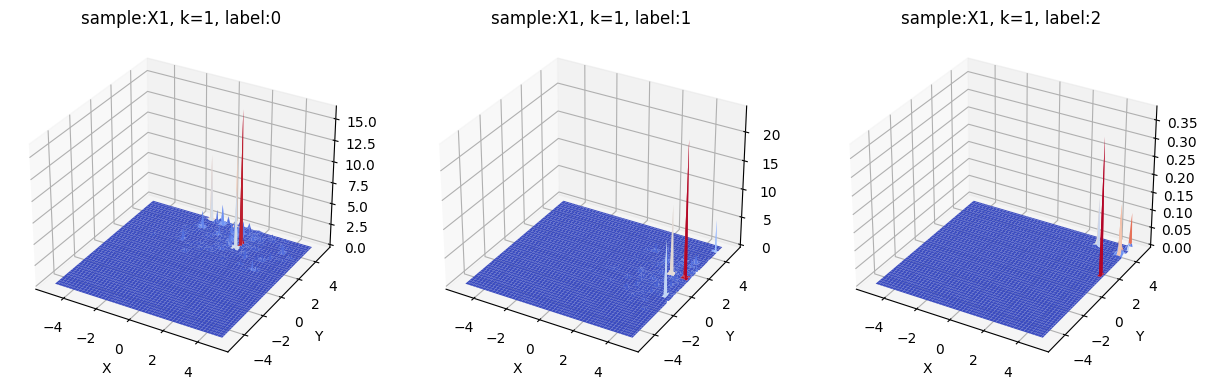

In [22]:
show_pic(X1, 1, "X1")

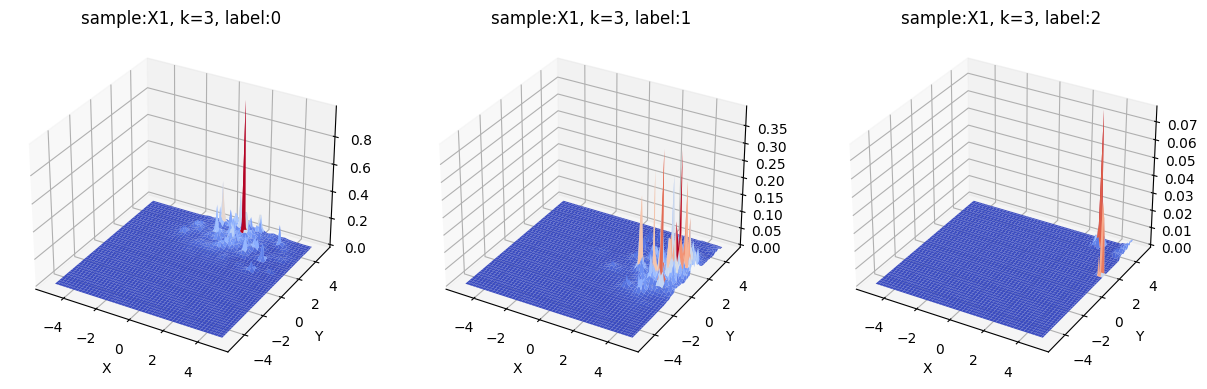

In [23]:
show_pic(X1, 3, "X1")

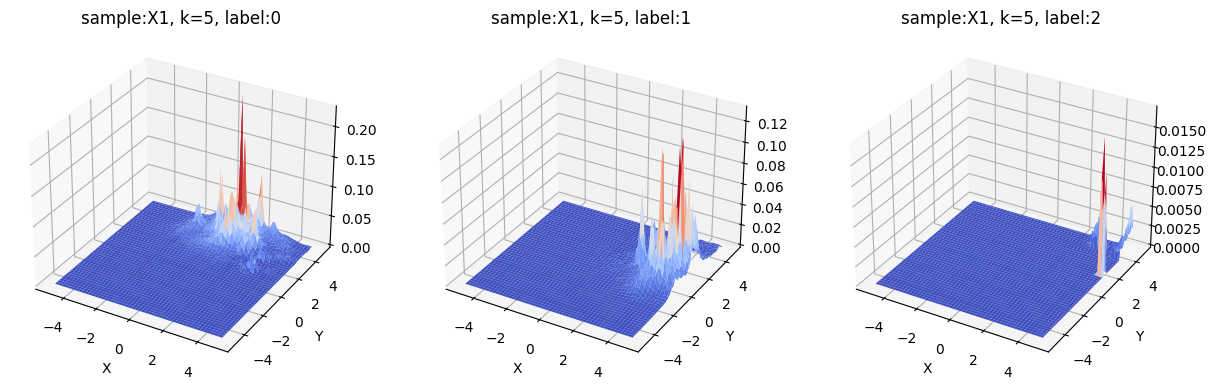

In [24]:
show_pic(X1, 5, "X1")

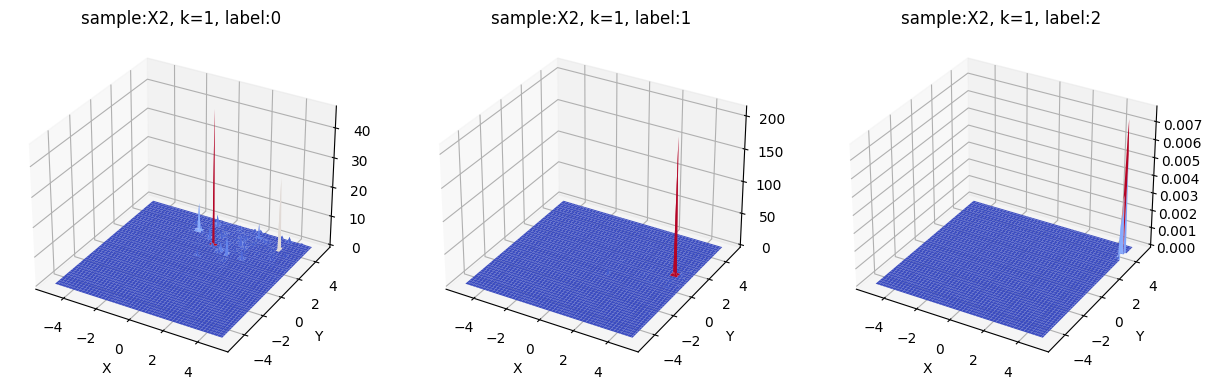

In [25]:
show_pic(X2, 1, "X2")

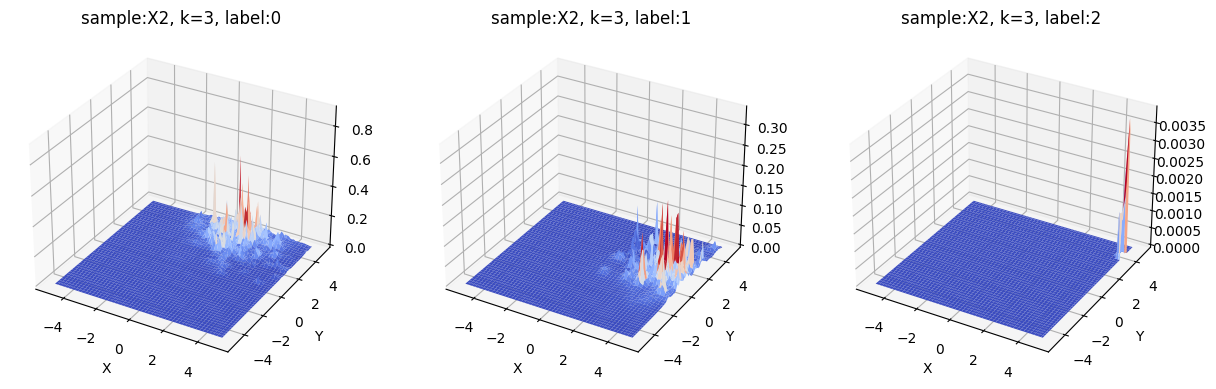

In [26]:
show_pic(X2, 3, "X2")

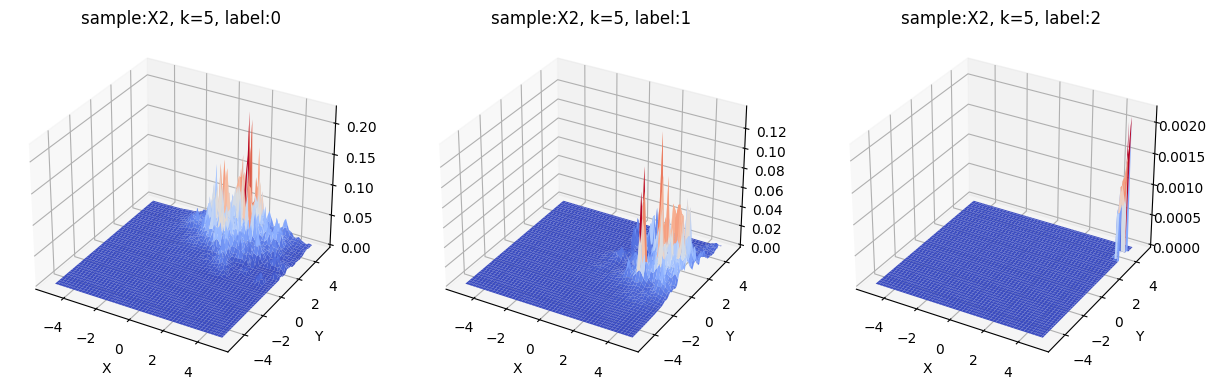

In [27]:
show_pic(X2, 5, "X2")